# Project: Wrangle and analyze data from WeRateDogs Twitter account 

## Table of contents


1. Introduction

2. Data wrangling:
<ul>2.1 Gathering data</ul>
<ul>2.2 Assessing data</ul>
<ul>2.3 Cleaning data</ul>

3.    Data analysis



<a id='intro'></a>
## 1. Introduction

The purpose of this project is to wrangle data from WeRateDogs Twitter account to create interesting and trustworthy analyses and visualizations.

## 2. Data wrangling

<a id='gathering'></a>
## 2.1. Gathering data

Gather three pieces of data:

1. "Twitter_archive_enhanced.csv" - The WeRateDogs Twitter archive. Downloaded this file manually.

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [1]:
# Import Pandas, NumPy, Requests, Time, Tweepy and JSON packages

import pandas as pd
import numpy as np
import requests
import time
import tweepy
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import WeRateDogs Twitter archive

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Import the tweet image prediction file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [4]:
with open (url.split('/')[-1], mode='wb') as file:
    file.write(r.content)

In [5]:
image_pred = pd.read_csv('image-predictions.tsv', delimiter='\t')

In [6]:
# Gather additional data via the Twitter API
# Source: https://github.com/S-Tabor/udacity-data-wrangling-project/blob/master/wrangle_project_final.ipynb

consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

tweet_ids = twitter_archive.tweet_id.values

with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError:
            print('Error: tweet missing')

Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Rate limit reached. Sleeping for: 732
Error: tweet missing
Error: tweet missing
Rate limit reached. Sleeping for: 733


In [7]:
# Convert JSON data to dataframe

tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)

In [8]:
tweets_df = pd.DataFrame(tweets_list)

In [9]:
tweets_df.to_csv('tweets_df.csv', index=False)

In [6]:
tweets_df = pd.read_csv('tweets_df.csv')

<a id='assessing'></a>
## 2.2. Assessing data

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
twitter_archive.duplicated().sum()

0

In [12]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Buddy          7
Bailey         7
Daisy          7
Toby           7
Scout          6
Jack           6
Rusty          6
Jax            6
Koda           6
Bella          6
Leo            6
Stanley        6
Oscar          6
Dave           6
Milo           6
Sunny          5
            ... 
Flurpson       1
Blipson        1
Clarq          1
Terrenth       1
Gerbald        1
Kobe           1
Benny          1
Gustaf         1
Dunkin         1
Ester          1
Philippe       1
Chuck          1
Millie         1
Cupid          1
Diogi          1
Shooter        1
Grizzwald      1
Brudge         1
Vinscent       1
such           1
Snicku         1
Griswold       1
Josep          1
Tebow          1
Kayla          1
Godzilla       1
Bradley        1
Kota          

In [15]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
image_pred.duplicated().sum()

0

In [19]:
tweets_df.head()

,favorite_count,retweet_count,tweet_id
0,37731,8222,892420639486877696
1,32411,6079,892177413194625024
2,24410,4023,891815175371796480
3,41058,8377,891689552724799489
4,39251,9082,891327551943041024


In [20]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
tweet_id          2339 non-null object
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [21]:
tweets_df.describe()

,favorite_count,retweet_count
count,2339.000000,2339.000000
mean,7889.381787,2899.797349
std,12226.912781,4889.699339
min,0.000000,0.000000
25%,1366.500000,583.000000
50%,3431.000000,1353.000000
75%,9660.500000,3380.000000
max,162867.000000,82878.000000


In [22]:
tweets_df.duplicated().sum()

0

In [23]:
tweets_df.tweet_id.value_counts()

na                    274
793286466235408384      2
829374333562798080      2
796149732779421699      2
822244810299936769      2
675354114423808004      2
775085121305206785      2
776113296390942720      2
732005607704649728      2
780601293052190720      2
674291829689331712      2
817423809049493505      2
790946047744966656      2
707610936765390848      2
800141411257643009      2
819006388206649344      2
789530855911882752      2
830583314243268608      2
675501041127936000      2
769940407350362112      2
763837560732971008      2
742423162642649089      2
819004789207928832      2
739544071010713604      2
679062609438445568      2
784826004988653570      2
679828437910089729      2
701214695424991232      2
670444949847023616      2
703041942922383361      2
                     ... 
666835004639617025      1
697259367968739328      1
797236631975657472      1
715696738036744192      1
743210550650376192      1
670435812165701632      1
743509040018268160      1
728760633324

#### Assessment for quality

`twitter-archive-enhanced.csv`:
- **rating_denominator**: Data type is int64
- **rating_numerator**: Data type is int64
- **rating_denominator**: Some entries have a denominator != 10.
- **in_reply_to_status_id**: Remove column as consequence of the tidiness assessment (see notes below)   
- **in_reply_to_user_id**: Same as above
- **retweeted_status_id**: Same as above           
- **retweeted_status_user_id**: Same as above      
- **retweeted_status_timestamp**: Same as above
- **name**: change column title to "dog_name"
- **name**: 745 missing names and several "a", "an", "old" values
- **timestamp**: data type is object
- **tweet_id**: data type is int64 and should be changed to object
- 181 entries are retweets and should be eliminated since each observation must form a row
- 78 entries are tweets replies and should be eliminated since only original tweets are analyzed

`image-prediction.tsv`:
- **p2, p2_conf, p2_dog, p3, p3_conf, p3_dog**: These columns can be removed since not useful for the sake of the analysis
- **tweet_id**: data type is int64 and should be changed to object

`tweet_df.csv`:
- **tweet_id**: 274 "na" values


#### Assessment for tidiness

`twitter-archive-enhanced.csv`:

- **doggo, floofer, pupper, puppo**: merge these columns into one
<br>
</br>
- Merging all the datasets into one master table

<a id='cleaning'></a>
## 2.3. Cleaning data

In [24]:
# Create a copy of 'twitter_archive' dataframe 

twitter_archive_clean = twitter_archive.copy()

In [25]:
# DEFINE ISSUE 1: rating_denominator and rating_numerator have int64 data type

# CLEAN ISSUE 1: convert data type to float to show decimal ratings

twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)

# TEST CLEANED ISSUE 1

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(6), int64(1)

In [26]:
# DEFINE ISSUE 2: Some entries have a denominator != 10

twitter_archive_clean.query('rating_denominator==50')['text']

1202    This is Bluebert. He just saw that both #Final...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
Name: text, dtype: object

In [27]:
# CLEAN ISSUE 2: These entries refer to tweets with multiple dogs. These will be excluded for consinstency

twitter_archive_clean = twitter_archive_clean.query('rating_denominator == 10')

# TEST CLEANED ISSUE 2 

twitter_archive_clean.rating_denominator.value_counts()

10.0    2333
Name: rating_denominator, dtype: int64

In [28]:
# DEFINE ISSUE 3: 181 entries are tweets replies and should be eliminated since only original tweets should be considered in the analysis

# CLEAN ISSUE 3

twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['in_reply_to_status_id'])]

# TEST CLEANED ISSUE 3

sum(twitter_archive_clean.retweeted_status_user_id.value_counts())

180

In [29]:
# DEFINE ISSUE 4: 78 entries are retweets and should be eliminated since only original tweets should be considered in the analysis

# CLEAN ISSUE 4:

twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

# TEST CLEANED ISSUE 4

sum(twitter_archive_clean.retweeted_status_user_id.value_counts())

0

In [30]:
# DEFINE ISSUE 5: Columns related with retweets and replies should be removed since only original tweets are considered in the analysis

# CLEAN ISSUE 5: 
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

# TEST CLEANED ISSUE 5

twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


In [31]:
# DEFINE ISSUE 6: 'name' column in twitter_archive is too generic 

# CLEAN ISSUE 6: Change 'name' column's title to 'dog_name'

twitter_archive_clean.rename(columns = {'name': 'dog_name'}, inplace = True)

# TEST CLEANED ISSUE 6

twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


In [32]:
# DEFINE ISSUE 7: timestamp has object as data type

# CLEAN ISSUE 7: convert data type to datetime 

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

# TEST CLEANED ISSUE 7

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2080 non-null int64
timestamp             2080 non-null datetime64[ns]
source                2080 non-null object
text                  2080 non-null object
expanded_urls         2077 non-null object
rating_numerator      2080 non-null float64
rating_denominator    2080 non-null float64
dog_name              2080 non-null object
doggo                 2080 non-null object
floofer               2080 non-null object
pupper                2080 non-null object
puppo                 2080 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 211.2+ KB


In [33]:
# DEFINE ISSUE 8: Dog's maturity stage variable occupy 4 columns instead of one

# CLEAN ISSUE 8: Merge 'doggo', 'floofer', 'pupper' and 'puppo' columns
# Source: https://github.com/latinacode/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb

twitter_archive_clean = twitter_archive_clean.melt(id_vars = ['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'dog_name'], 
                           value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],
                           value_name = "dog_stage")

In [34]:
# Drop 'variable' column

twitter_archive_clean.drop(['variable'], axis = 1, inplace = True)

In [35]:
# Drop duplicated tweets

twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

In [36]:
# TEST CLEANED ISSUE 8

twitter_archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_name,dog_stage
2005,667405339315146752,2015-11-19 18:13:27,This is Biden. Biden just tripped... 7/10 http...,7.0,10.0,Biden,None
2004,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10.0,None,None
2003,667437278097252352,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup....,10.0,10.0,None,None
2002,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,None
2001,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None
2000,667455448082227200,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None
1999,667470559035432960,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,None
1998,667491009379606528,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None
1997,667495797102141441,2015-11-20 00:12:54,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,None
1996,667502640335572993,2015-11-20 00:40:05,Say hello to Hall and Oates. Oates is winking ...,11.0,10.0,Hall,None


In [ ]:
# ISSUE 9: tweet_id column data type in twitter_archive is int64

# CLEAN ISSUE 9: Change data type to object since IDs are not numeric and are not intended to perform calculations

twitter_archive_clean['tweet_id'] = tweets_df_clean['tweet_id'].astype(str)

# TEST CLEANED ISSUE 9

twitter_archive_clean.info()

In [37]:
# Create a copy of 'image_pred' datatframe

image_pred_clean = image_pred.copy()

In [38]:
# DEFINE ISSUE 10: 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf' and 'p3_dog' columns in image_pred dataframe are not necessary for the analysis

# CLEAN ISSUE 10: Drop the columns

image_pred_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

# TEST CLEANED ISSUE 10

image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


In [ ]:
# ISSUE 11: tweet_id column data type in twitter_archive is int64

# CLEAN ISSUE 11: Change data type to object since IDs are not numeric and are not intended to perform calculations

image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)

# TEST CLEANED ISSUE 11

image_pred_clean.info()

In [39]:
# Create a copy of 'tweet_df' dataframe

tweets_df_clean = tweets_df.copy()

In [40]:
# DEFINE ISSUE 12: there are 274 "na" values in tweet_id column of tweet_df data frame

# CLEAN ISSUE 12: Filter out 'na' values

tweets_df_clean = tweets_df_clean.query('tweet_id != "na"')

# TEST CLEANED ISSUE 12:

tweets_df_clean.tweet_id.value_counts()

667509363477577728    2
769940407350362112    2
830583314243268608    2
789530855911882752    2
777684227185868800    2
789986461038837761    2
675501041127936000    2
685325091882799104    2
761004543874392064    2
788765906553962498    2
800141411257643009    2
742423162642649089    2
763837560732971008    2
673320125483892736    2
765222089175556096    2
826958645422342144    2
679158360810352640    2
725842282449125380    2
819006388206649344    2
707610936765390848    2
795076720525279233    2
784826004988653570    2
796149732779421699    2
819004789207928832    2
822244810299936769    2
675354114423808004    2
739544071010713604    2
790946047744966656    2
775085121305206785    2
776113296390942720    2
                     ..
697259367968739328    1
687818498882551808    1
882045864507736065    1
668815173491302400    1
715696738036744192    1
743210550650376192    1
670435812165701632    1
743509040018268160    1
728760633324351488    1
741438250968047616    1
7692122747289640

In [42]:
# Merge twitter_archive_clean, image_pred_clean and tweets_df_clean into twitter_archive_master.csv

twitter_archive_master_part_1 = pd.merge(twitter_archive_clean, tweets_df_clean, on='tweet_id', how='left')

#tweets_df_clean['tweet_id'] = tweets_df_clean['tweet_id'].astype(np.int64)
#twitter_archive_master_part_1['tweet_id'] = twitter_archive_master_part_1['tweet_id'].astype(np.int64)

twitter_archive_master = pd.merge(twitter_archive_master_part_1, image_pred_clean,on=['tweet_id'],how='left')

In [43]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

In [44]:
master = pd.read_csv('twitter_archive_master.csv')
master

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,6.720681e+17,2015-11-19 18:13:27,This is Biden. Biden just tripped... 7/10 http...,7.0,10.0,Biden,None,1295.0,525.0,https://pbs.twimg.com/media/DC20wEcW0AAf59m.jpg,1.0,basset,0.995368,True
1,6.720822e+17,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10.0,None,None,945.0,374.0,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1.0,Saluki,0.509967,True
2,6.720952e+17,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup....,10.0,10.0,None,None,1007.0,374.0,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1.0,Pembroke,0.931120,True
3,6.721253e+17,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,None,2420.0,1162.0,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1.0,bloodhound,0.575751,True
4,6.721393e+17,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None,1755.0,725.0,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,1.0,golden_retriever,0.874566,True
5,6.721600e+17,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None,879.0,365.0,https://pbs.twimg.com/media/DCiavj_UwAAcXep.jpg,1.0,Bernese_mountain_dog,0.534327,True
6,6.721697e+17,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,None,1026.0,374.0,https://pbs.twimg.com/media/DCdH8YpUQAAiEbL.jpg,1.0,Labrador_retriever,0.799551,True
7,6.722054e+17,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None,2275.0,1175.0,https://pbs.twimg.com/ext_tw_video_thumb/87514...,1.0,Siberian_husky,0.245048,True
8,6.722228e+17,2015-11-20 00:12:54,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,None,787.0,215.0,https://pbs.twimg.com/media/DCSzF3NVoAAPzT4.jpg,2.0,West_Highland_white_terrier,0.714319,True
9,6.722310e+17,2015-11-20 00:40:05,Say hello to Hall and Oates. Oates is winking ...,11.0,10.0,Hall,None,1844.0,1038.0,https://pbs.twimg.com/media/DCN85nGUwAAzG_q.jpg,1.0,Labrador_retriever,0.836052,True


<a id='analysis'></a>
## 3. Data analysis

In [183]:
# Most common races

master.p1.value_counts()

golden_retriever             134
Labrador_retriever            91
Pembroke                      88
Chihuahua                     78
pug                           54
chow                          41
Samoyed                       40
Pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
seat_belt                     21
miniature_pinscher            21
German_shepherd               20
Siberian_husky                19
Staffordshire_bullterrier     19
Shetland_sheepdog             18
Eskimo_dog                    18
Shih-Tzu                      17
Maltese_dog                   17
beagle                        17
Cardigan                      17
teddy                         16
Italian_greyhound             16
Rottweiler                    16
Lakeland_terrier              15
kuvasz                        15
web_site                      14
          

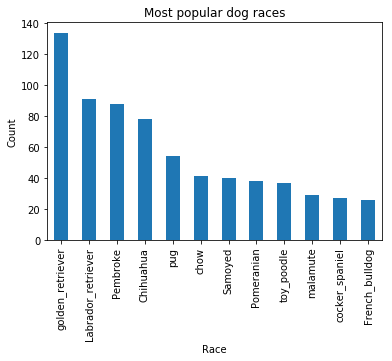

In [184]:
# Most common races
# Source: https://stackoverflow.com/questions/29836836/how-do-i-filter-a-pandas-dataframe-based-on-value-counts

top_races = master.groupby('p1').filter(lambda x: len(x) > 25)
top_races['p1'].value_counts().plot(kind = 'bar', colormap='tab10')
plt.title('Most popular dog races')
plt.xlabel('Race')
plt.ylabel('Count');

In [185]:
# Count of dogs by maturity stage 

master.dog_stage.value_counts()

None       1744
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

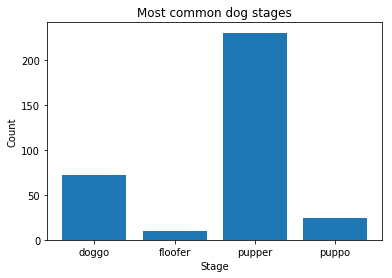

In [189]:
dog_stage = ['pupper', 'doggo', 'puppo', 'floofer']
dog_counts = [230, 72, 24, 10]

fig, ax = plt.subplots()
ax.bar(dog_stage, dog_counts)
ax.set_ylabel('Count')
ax.set_xlabel('Stage')
plt.title("Most common dog stages");

In [190]:
# Mean rating by dog maturity stage

master.groupby('dog_stage').rating_numerator.mean()

dog_stage
None       11.802752
doggo      11.847222
floofer    11.800000
pupper     10.817391
puppo      12.041667
Name: rating_numerator, dtype: float64

In [191]:
# Median rating by dog maturity stage

master.groupby('dog_stage').rating_numerator.median()

dog_stage
None       11.0
doggo      12.0
floofer    12.0
pupper     11.0
puppo      12.0
Name: rating_numerator, dtype: float64

#### Conclusions

- The most common dog's races are:

    golden_retriever             
    Labrador_retriever            
    Pembroke                      
    Chihuahua                     
    pug                           
    chow                          
    Samoyed                       
    Pomeranian                    
    toy_poodle                    
    malamute                      
<br>
</br>  
- The most frequent dog's maturity stage is pupper
<br>
</br>

- Puppo dogs receive higher votes on average
